In [11]:
import matplotlib.pyplot as plt
import numpy as np

<class 'numpy.ndarray'>


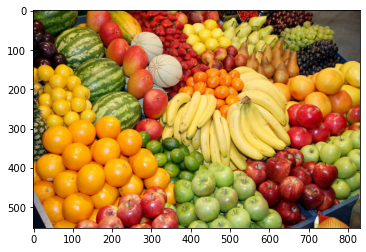

In [21]:
## Read Image and convert it to numpy array
image_arr = plt.imread("fruits.jpg")
print(type(image_arr))
plt.imshow(image_arr)
plt.show()

## K-Means Implemetation

In [22]:
print(image_arr.shape)
label_arr = np.zeros((image_arr.shape[0],image_arr.shape[1]))
print(label_arr.shape)
print(label_arr.size)

(553, 830, 3)
(553, 830)
458990


In [24]:
## Assign random labels to each pixel
K = 7 # K is the number of clusters that we want to create 

for i in range(label_arr.shape[0]):
    for j in range(label_arr.shape[1]):
        label_arr[i,j] = np.random.choice(K)
print(label_arr[0:10,0:10])

[[0. 3. 2. 6. 6. 1. 5. 3. 1. 4.]
 [1. 2. 3. 0. 5. 5. 3. 5. 6. 4.]
 [0. 4. 1. 6. 3. 2. 1. 4. 0. 4.]
 [4. 4. 1. 0. 3. 6. 1. 2. 5. 6.]
 [6. 1. 0. 6. 4. 3. 6. 0. 2. 4.]
 [1. 5. 3. 6. 6. 5. 0. 2. 6. 4.]
 [3. 1. 2. 0. 4. 1. 2. 5. 4. 6.]
 [6. 3. 2. 1. 6. 1. 2. 4. 5. 3.]
 [4. 6. 1. 0. 5. 5. 6. 5. 5. 3.]
 [1. 3. 0. 5. 0. 2. 5. 2. 6. 2.]]


In [35]:
## Euclidean Distance between two vectors
def dist(vec1,vec2):
    L = len(vec1)
    s1 = 0
    for l in range(L):
        diff = np.abs(vec2[l]-vec1[l])
        s1 = s1 + diff**2
    distance = s1**(1/2)
    return(distance)

In [36]:
## Generate new centriods from updated labels
def mean_update(K,img_arr,label_arr,prev_mean=None): # previous mean is None when mean is initialized for the first time
    mean_ls = [] # List containing mean values of the clusters
    pixel_ls = [[] for k in range(K)]  # Create list of empty lists to store pixels belonging to a certain cluster
    
    for i in range(label_arr.shape[0]):
        for j in range(label_arr.shape[1]):
            for k in range(K):
                if label_arr[i,j] == k: # if the label of the pixel at location [i,j] is 'k'
                    pixel_ls[k].append(np.ravel(img_arr[i,j,:])) ## Fill the kth empty list with this pixel value
                    
    for k in range(K):
        if len(pixel_ls[k]) != 0:  # Only update the means of those clusters which has received at least one new point, else retain the old mean value
            pixel_mat = np.matrix(pixel_ls[k])
            mean_k = np.mean(pixel_mat,axis=0)
            mean_ls.append(np.ravel(mean_k))
        else:
            mean_ls.append(prev_mean[k])
    return(mean_ls)

In [37]:
## Function to update labels from previous mean
def label_update(mean_arr,img_arr,label_arr):
    for i in range(img_arr.shape[0]):
        for j in range(img_arr.shape[1]):
            dist_ls = [] 
            for k in range(len(mean_arr)):
                distance = dist(img_arr[i,j,:],mean_arr[k]) # Calculate the distance of the pixel at [i,j] with the kth mean
                dist_ls.append(distance) # Put the distance values in a list
            dist_arr = np.array(dist_ls) # Convert it to a NumPy array
            new_label = np.argmin(dist_arr) #The new_label of the point is the one which is closest to the pixel at [i,j]
            label_arr[i,j] = new_label # Set the new label
    return(label_arr)

In [38]:
## Define KMeans Algorithm
def KMeans(K,img_arr,label_arr,maxIter):
    mean_old = mean_update(K,img_arr,label_arr)
    for t in range(maxIter):
        new_label_arr = label_update(mean_old,img_arr,label_arr)
        mean_new = mean_update(K,img_arr,new_label_arr,mean_old)
        print("The mean obtained at {}th iteration is {}\n".format(t,mean_new))
        label_arr = new_label_arr ## Update the label array
        mean_old = mean_new ## Update the mean values
    return(mean_new,label_arr)

In [39]:
mean_final,label_final = KMeans(K,image_arr,label_arr,5)

The mean obtained at 0th iteration is [array([220.07239121, 184.83415945,  99.02381944]), array([174.68373899, 124.60801431,  51.35280088]), array([93.99000741, 63.0781835 , 34.387744  ]), array([215.15945743, 117.84498473,  13.31916803]), array([174.71652163, 124.63875215,  51.41812335]), array([161.47497067, 163.50143397,  43.19560683]), array([174.87952303, 124.58985072,  51.272152  ])]

The mean obtained at 1th iteration is [array([226.33142306, 197.17431164, 105.26025054]), array([145.58914637, 105.44963348,  43.57495862]), array([85.20325452, 47.60051082, 25.9875664 ]), array([225.06893603, 124.6809309 ,  14.627632  ]), array([164.16834269, 122.48883375,  91.26341909]), array([150.32477791, 158.5386854 ,  56.17618485]), array([194.02043064,  91.61109634,  53.1973949 ])]

The mean obtained at 2th iteration is [array([228.89084692, 201.49615992, 107.60714536]), array([127.35629782, 103.72462377,  34.0888274 ]), array([73.59625201, 39.02711099, 22.48919656]), array([232.03159508, 14

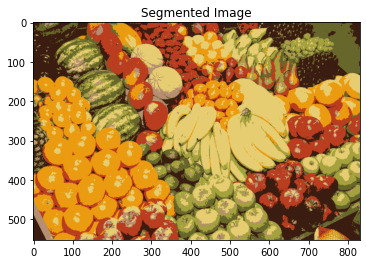

In [40]:
def segmentImage(image_arr,label_arr,mean_ls):
    seg_image = np.zeros((image_arr.shape[0],image_arr.shape[1],image_arr.shape[2]))
    for i in range(seg_image.shape[0]):
        for j in range(seg_image.shape[1]):
            k = label_arr[i,j]
            seg_image[i,j,:] = mean_ls[int(k)]
    seg_image = seg_image.astype(np.uint8)
    plt.imshow(seg_image)
    plt.title("Segmented Image")
    plt.show()
segmentImage(image_arr,label_final,mean_final)